[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RobertTLange/mle-logging/blob/main/examples/01_getting_started.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

from mle_logging import MLELogger

# Storing Logging Results

In [2]:
# Instantiate logging to experiment_dir
log = MLELogger(time_to_track = ['num_updates', 'num_epochs'],
                what_to_track = ['train_loss', 'test_loss'],
                time_to_print = ['num_updates', 'num_epochs'],
                what_to_print = ['train_loss', 'test_loss'],
                experiment_dir = "experiment_dir/",
                config_fname = None,
                use_tboard = True,
                model_type = 'torch',
                print_every_k_updates = 1,
                overwrite_experiment_dir = 1)

In [3]:
# Save some time series statistics
time_tic = {'num_updates': 10,
            'num_epochs': 1}
stats_tic = {'train_loss': 0.1234,
             'test_loss': 0.1235}

# Update the log with collected data & save it to .hdf5
log.update(time_tic, stats_tic)
log.save()

In [4]:
# Save a model (torch, sklearn, jax, numpy)
import torch.nn as nn

class DummyModel(nn.Module):
    def __init__(self):
        super(DummyModel, self).__init__()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# Initialize model
model = DummyModel()
log.save_model(model)

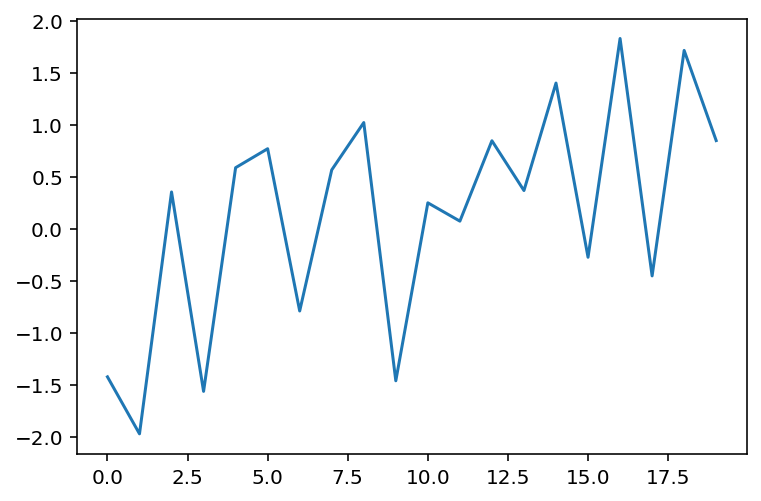

In [5]:
# Save a matplotlib figure as .png
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.random.normal(0, 1, 20))
log.save_plot(fig)
# You can also explicity give a name to the file
# log.save_plot(fig, "some_figure_path.png")

In [6]:
# You can also save (somewhat) arbitrary objects .pkl
some_dict = {"hi" : "there"}
log.save_extra(some_dict)

# You can also explicity give a name to the file
# log.save_extra(some_dict, "some_object_path.pkl")

In [7]:
# Or do everything in one go
log.update(time_tic, stats_tic,
           model, fig, some_dict,
           save=True)

# Reloading for Post-Processing

In [8]:
from mle_logging import load_log

log = load_log("experiment_dir/")

In [9]:
log.meta.keys()

odict_keys(['config_fname', 'eval_id', 'experiment_dir', 'extra_storage_paths', 'fig_storage_paths', 'log_paths', 'model_ckpt', 'model_type'])

In [10]:
log.meta.model_ckpt[0].decode()

'experiment_dir/models/final/21-08-06_no_seed_provided.pt'

In [11]:
log.stats.keys()

odict_keys(['test_loss', 'train_loss'])

In [12]:
log.stats.test_loss

array([0.1235, 0.1235], dtype=float32)

In [13]:
log.time.keys()

odict_keys(['num_epochs', 'num_updates', 'time', 'time_elapsed'])

In [14]:
log.time.num_updates

array([10., 10.], dtype=float32)